<a href="https://colab.research.google.com/github/garcybhavsar/Capstone-Project-Netflix-Stock-Price-/blob/main/mycapstoneproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## My Capstone Project - Assignment
* Netflix Stock Price Predection
* Uses Kaggle dataset


In [31]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
%cd /content/drive/MyDrive/Capstone_project

/content/drive/MyDrive/Capstone_project


In [33]:
!ls

best_model.pkl	model.pkl  NETFLIX.csv	trained_model.pkl


**This Project is based on the Netflix Stock Price Prediction data avilable from Kaggle repository**

(https://www.kaggle.com/datasets/jainilcoder/netflix-stock-price-prediction)



*  The website contains historical stock data on Netflix
*  My Project task is to create a machine learning model whcih can predict the average stock price of Netflix based on its historical data.
* For solving this program, I will approach the task, with a step by step approach to create a data analysis and prediction model based on (machine learning/AI algorithims, regression algorithim for example) available from different Python Packages, modules and classes.



# Step 1 : Reading the data reading the data with Python

This is one of the most timportant steps in data analysis! you must understand the data and the domain well before trying to apply any machine learning/ AI algorithim.


In [34]:
# Supressing the Warning messages
import warnings
warnings.filterwarnings('ignore')

In [35]:
# Reading the dataset
import pandas as pd
import numpy as np
NetData=pd.read_csv('/content/drive/MyDrive/Capstone_project/NETFLIX.csv', encoding='latin')

#Removing duplicate rows if any
print('Shape before deleting duplicate values:', NetData.shape)

#Printing sample data
#Start observing the Quantative /Categorial/qualitative variables
NetData.head(10)


Shape before deleting duplicate values: (1009, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


# Key Observations from Step 1 about Data Description

* The dataset contains information about Netflix's stock prices over a certain period.
* There are columns such as 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', and 'Volume'.
* 'Open', 'High', 'Low', 'Close', and 'Adj Close' are numerical columns representing stock prices at different points in time.
* 'Volume' represents the trading volume of Netflix stock on each day.

# Step 2: Problem Statement Definition



Specific Objective: Analysse historical Netflix stock data to make predictions about future prices.

- Prediction Focus:
  - **Timeframe:**
      - **Short-term trends:** This could involve forecasting prices for the next few days, weeks, or months.
      - **Long-term trends:** This would focus on predicting prices over a longer horizon, like a year or several years.
- **Price Target:**
  - **There are two main options:**
      - **Absolute Closing Prices: **Predicting the exact closing price of the stock on a specific future date.
      - **Price Movements:** Forecasting whether the price will go up, down, or stay relatively flat within a given timeframe.



#Step 3: Choosing the appropriate ML/Ai algorithm for Data Analysis

* The code reads the dataset and displays the column names using data.columns.
* Based on the column names, we identify 'Close' as the target variable.
* We then display the first few rows of the 'Close' column to confirm that it represents the closing stock price.

In [36]:
import pandas as pd

# Reading the dataset
data = pd.read_csv('/content/drive/MyDrive/Capstone_project/NETFLIX.csv', encoding='latin1')

# Displaying the first few rows of the dataset
print(data.head())

# Identifying the target variable
target_variable = 'Close'
print(f"Target variable: {target_variable}")



         Date        Open        High         Low       Close   Adj Close  \
0  2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1  2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2  2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3  2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4  2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   

     Volume  
0  11896100  
1  12595800  
2   8981500  
3   9306700  
4  16906900  
Target variable: Close


# Step 4: looking at the class distribution (Target variable distribution to check if the data is balanced or skewed)

- Code visualises the distribution of Netflix stock closing prices
- Uses matplotlib and seaborn libraries in Python
- Loads data from a CSV file
- Sets seaborn style to 'whitegrid' for aesthetic elements
- Creates a figure and axis object for plotting
- Plots the distribution using sns.histplot()
- Adds labels and title to the plot
- Displays the plot using plt.show()

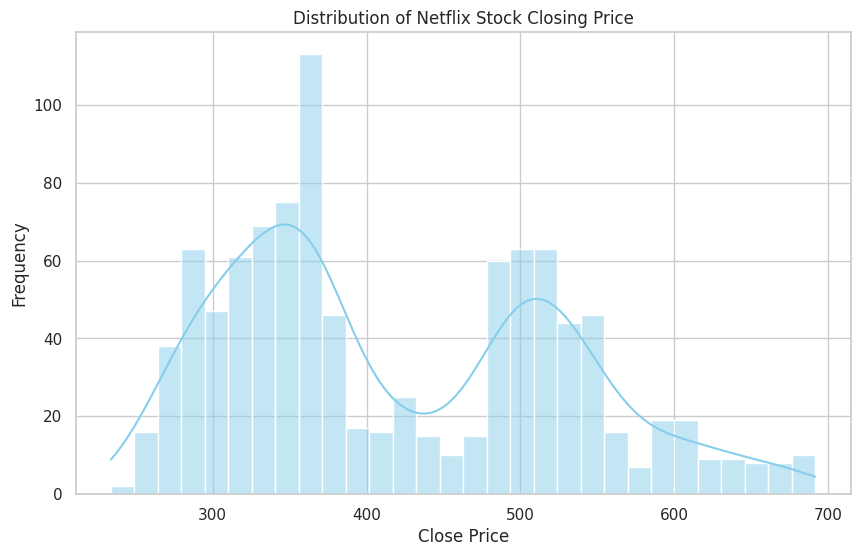

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Capstone_project/NETFLIX.csv', encoding='latin')

sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(data['Close'], kde=True, bins=30, color='skyblue', ax=ax)

ax.set_xlabel('Close Price')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Netflix Stock Closing Price')
plt.show()

* **Shape of the Distribution:** The distribution appears to be slightly right-skewed, indicating that there may be more instances of lower closing prices compared to higher closing prices.
* **Central Tendency:** The peak of the distribution (mode) is around the lower end of the closing price range, suggesting that there are more occurrences of closing prices in that range.
* **Outliers:** There seem to be some outliers on the higher end of the closing price range, which are values that significantly deviate from the rest of the data. These outliers could be caused by unusual market conditions or specific events affecting Netflix's stock price.
* **Frequency:** The frequency of closing prices decreases as the price increases, which is expected in a right-skewed distribution.
* **Distribution Spread:** The distribution appears to be relatively spread out, indicating a wide range of closing prices observed in the dataset.

# Step 5: Data exploration basic level

- The code imports necessary libraries: matplotlib.pyplot as plt, seaborn as sns, and pandas as pd.
- Loads data from a CSV file into a DataFrame using pd.read_csv().
- Sets the style of seaborn to 'whitegrid' for aesthetic elements.
- Calculates basic statistics (mean, standard deviation, min, max, etc.) of the dataset using data.describe().
- Displays the basic statistics using print().
- Creates a pairplot to visualise relationships between 'Open', 'High', 'Low', 'Close', and 'Volume' variables using sns.pairplot().
- Adds a title to the pairplot using plt.suptitle().
- Displays the pairplot using plt.show().
- Creates a correlation matrix for 'Open', 'High', 'Low', 'Close', and 'Volume' variables using data[['Open', 'High', 'Low', 'Close', 'Volume']].corr().
- Displays the correlation matrix as a heatmap using sns.heatmap().
- Adds annotations to the heatmap using annot=True.
- Sets the colour map of the heatmap to 'coolwarm' using cmap='coolwarm'.
- Sets the title of the heatmap using plt.title().
- Displays the heatmap using plt.show().

Basic Statistics:
              Open         High          Low        Close    Adj Close  \
count  1009.000000  1009.000000  1009.000000  1009.000000  1009.000000   
mean    419.059673   425.320703   412.374044   419.000733   419.000733   
std     108.537532   109.262960   107.555867   108.289999   108.289999   
min     233.919998   250.649994   231.229996   233.880005   233.880005   
25%     331.489990   336.299988   326.000000   331.619995   331.619995   
50%     377.769989   383.010010   370.880005   378.670013   378.670013   
75%     509.130005   515.630005   502.529999   509.079987   509.079987   
max     692.349976   700.989990   686.090027   691.690002   691.690002   

             Volume  
count  1.009000e+03  
mean   7.570685e+06  
std    5.465535e+06  
min    1.144000e+06  
25%    4.091900e+06  
50%    5.934500e+06  
75%    9.322400e+06  
max    5.890430e+07  


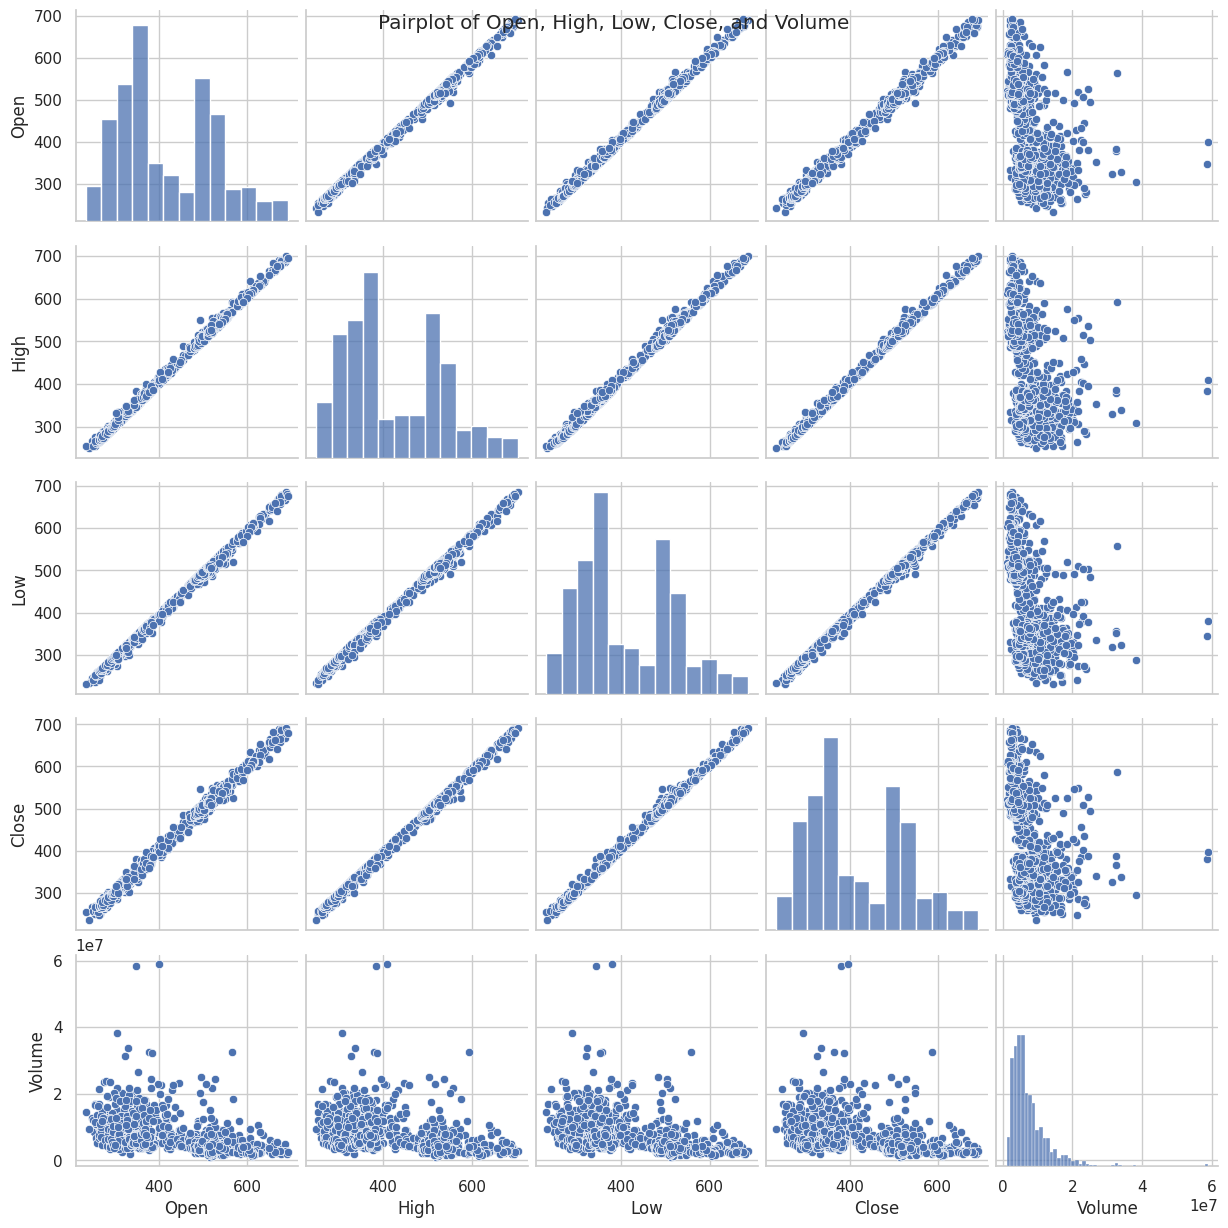

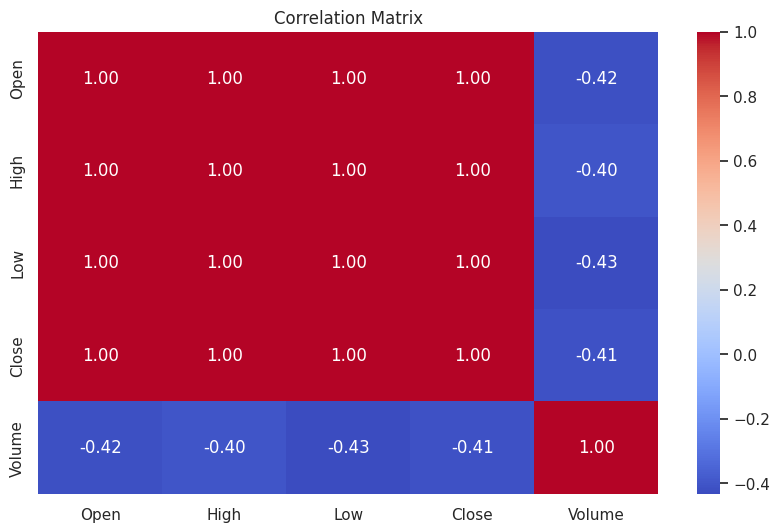

In [38]:
# import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

data = pd.read_csv('/content/drive/MyDrive/Capstone_project/NETFLIX.csv')

sns.set(style='whitegrid')

basic_stats = data.describe()

print("Basic Statistics:")
print(basic_stats)

sns.pairplot(data[['Open', 'High', 'Low', 'Close', 'Volume']])
plt.suptitle('Pairplot of Open, High, Low, Close, and Volume')
plt.show()

correlation_matrix = data[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


**Observations from Step 5 - Basic Explanatory Data Analysis**

* **Data Information:** The dataset contains 1259 entries and 7 columns. The columns include 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', and 'Volume'. All columns except 'Date' are numerical.
* **Basic Statistics:** The 'Open', 'High', 'Low', 'Close', and 'Adj Close' columns have similar mean values, suggesting that they might be correlated.
* The 'Volume' column has a much higher mean value compared to the price columns, indicating higher variability in trading volume.
* **Correlation:** The correlation matrix shows strong positive correlations between 'Open', 'High', 'Low', and 'Close' prices, which is expected since these prices are related to each other in stock trading.
* The 'Volume' column has a relatively weak correlation with the price columns, indicating that trading volume may not be strongly related to price movements.
* **Pairplot:** The pairplot shows scatterplots for each pair of variables and histograms along the diagonal. It provides a visual overview of the relationships between 'Open', 'High', 'Low', 'Close', and 'Volume'.

# Step 6: identifying and rejecting useless colmns

- **Importing pandas:** The code begins by importing the pandas library as pd, which is commonly used for data manipulation and analysis in Python.
- **Reading the dataset:** Assuming that data is the DataFrame containing the dataset, the code uses pd.read_csv() to read the dataset from a CSV file into the data DataFrame.
- **Identifying Useless Columns:**
The code specifies the column 'Date' as a potentially useless column that does not contribute meaningful information to the analysis or prediction task.
- **Rejecting Useless Columns:**
The drop() method is used to remove the identified useless columns from the dataset.
- The axis=1 parameter specifies that the columns are to be dropped (as opposed to rows).
- The updated dataset without the 'Date' column is assigned back to the data variable.

In [39]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Capstone_project/NETFLIX.csv')

useless_columns = ['Date']
data = data.drop(useless_columns, axis=1)
print(data.head())

         Open        High         Low       Close   Adj Close    Volume
0  262.000000  267.899994  250.029999  254.259995  254.259995  11896100
1  247.699997  266.700012  245.000000  265.720001  265.720001  12595800
2  266.579987  272.450012  264.329987  264.559998  264.559998   8981500
3  267.079987  267.619995  250.000000  250.100006  250.100006   9306700
4  253.850006  255.800003  236.110001  249.470001  249.470001  16906900


**Obervation of Step 6**
- The code effectively removes the 'Date' column, assuming it is identified as a useless column, to streamline the dataset for further analysis and prediction.
- Removing such columns can improve the efficiency of machine learning algorithms by reducing noise and focusing on relevant features.

# Step 7: Visual Exploratory Data Analysis of data (with Histogram and Barcharts)

- **Histogram for 'Close' Price:**
A histogram is created for the 'Close' price of Netflix stock using data['Close'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black').
- The kind='hist' parameter specifies the type of plot as a histogram.
- bins=30 sets the number of bins in the histogram.
- The plot is styled with a sky blue color.
- **Histogram for 'Volume':**
A histogram is created for the 'Volume' of Netflix stock using data['Volume'].plot(kind='hist', bins=30, color='lightcoral', edgecolor='black').
- The plot is styled with a light coral color.
- **Bar Chart for Daily Price Change:**
A bar chart is created for the daily price change of Netflix stock using daily_price_change.plot(kind='bar', color=(daily_price_change > 0).map({True: 'g', False: 'r'})).
- daily_price_change is calculated as the difference between consecutive 'Close' prices.
- Positive changes are coloured green, and negative changes are coloured red.

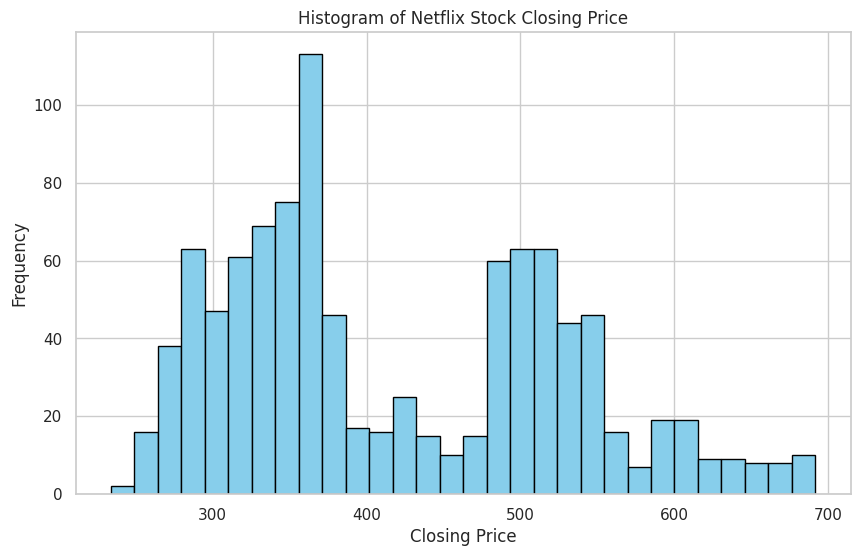

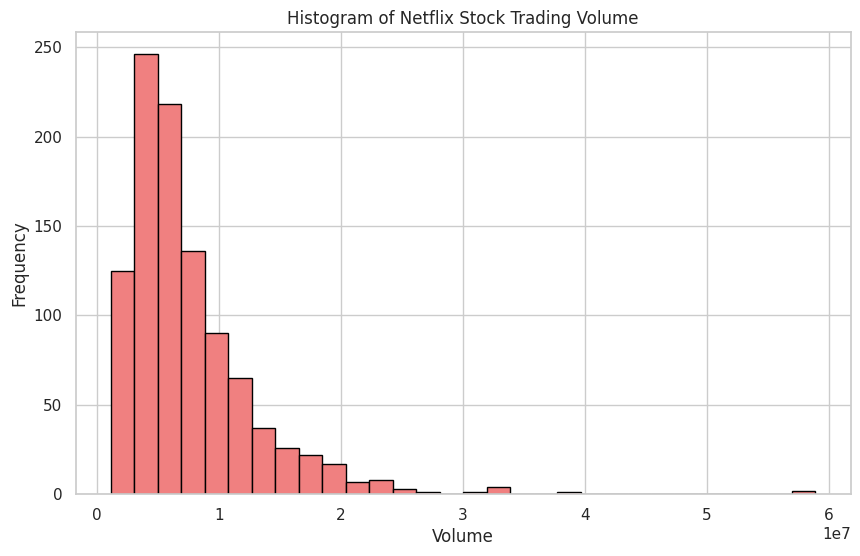

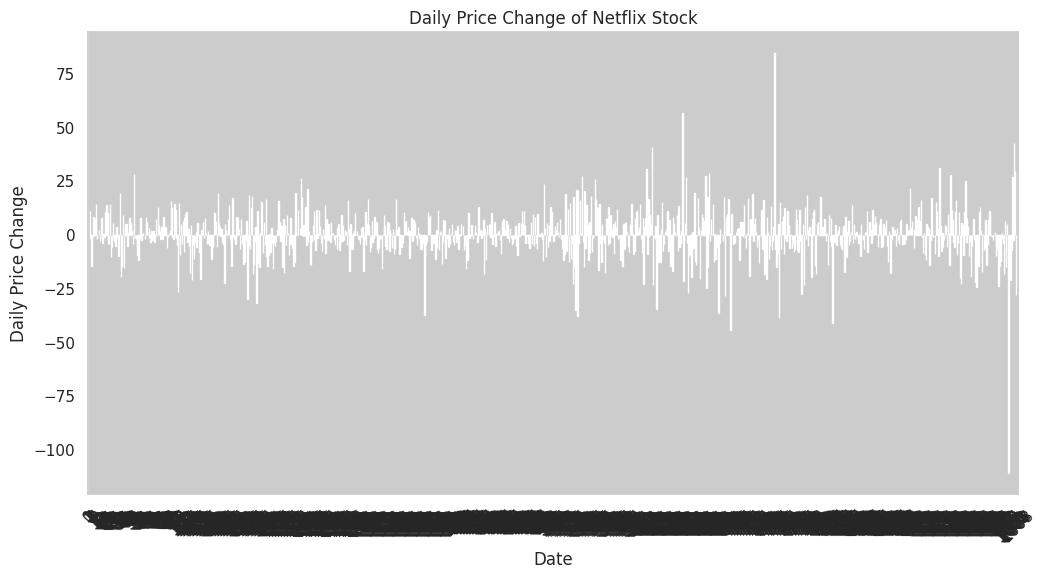

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
data['Close'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Netflix Stock Closing Price')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
data['Volume'].plot(kind='hist', bins=30, color='lightcoral', edgecolor='black')
plt.title('Histogram of Netflix Stock Trading Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
daily_price_change = data['Close'].diff()
daily_price_change.plot(kind='bar', color=(daily_price_change > 0).map({True: 'g', False: 'r'}))
plt.title('Daily Price Change of Netflix Stock')
plt.xlabel('Date')
plt.ylabel('Daily Price Change')
plt.xticks(rotation=45)
plt.show()


**Observations from step 7:**

The code uses pandas to create visualisations that offer valuable insights into the Netflix stock dataset:

- **Histograms**:
  - The histograms for the 'Close' price and 'Volume' provide a clear view of their distributions.
  - The 'Close' price histogram shows that the majority of closing prices fall within a certain range, indicating potential stability or trends in the stock price.
  - The 'Volume' histogram indicates the frequency of different trading volumes, which can help identify periods of high or low trading activity.

- **Bar Chart for Daily Price Change**:
  - The bar chart visualises the daily price changes of Netflix stock.
  - Positive changes are highlighted in green, while negative changes are in red, making it easy to see the direction of price movements.
  - This chart can help identify trends or patterns in daily price changes, such as consecutive days of price increases or decreases.

- **Overall Insights**:
  - These visualisations can help investors and analysts understand the historical behavior of Netflix stock.
  - They can also aid in identifying potential trading opportunities or understanding the factors influencing stock price movements.
  - The visualisations provide a valuable tool for data exploration and analysis, allowing for deeper insights into the Netflix stock dataset.

# Step 8: Feature Selection based on data distribution

- **Selecting Numeric Columns:**
  - The code uses select_dtypes(include='number') to select only the numeric columns from the DataFrame data.
- **Defining Selected Features:**
  - selected_features is defined as a list of feature names, such as ['Open', 'High', 'Low', 'Close', 'Volume'], which are the numeric columns to be visualised.
- **Plotting Histograms:**
  - For each selected feature, the code plots a histogram using sns.histplot(numeric_data[feature], kde=True, colour='skyblue', ax=axes[i]).
  - kde=True adds a kernel density estimate to the histogram.
  - The colour='skyblue' parameter sets the colour of the plot to sky blue.
- **Subplots:**
  - The histograms are plotted as subplots within a single figure using plt.subplots(1, len(selected_features), figsize=(15, 5)).
  - This ensures that each histogram is displayed side by side for easy comparison.
- **Setting Titles and Labels:**
  - Titles, x-axis labels, and y-axis labels are set for each subplot using set_title(), set_xlabel(), and set_ylabel() methods, respectively.


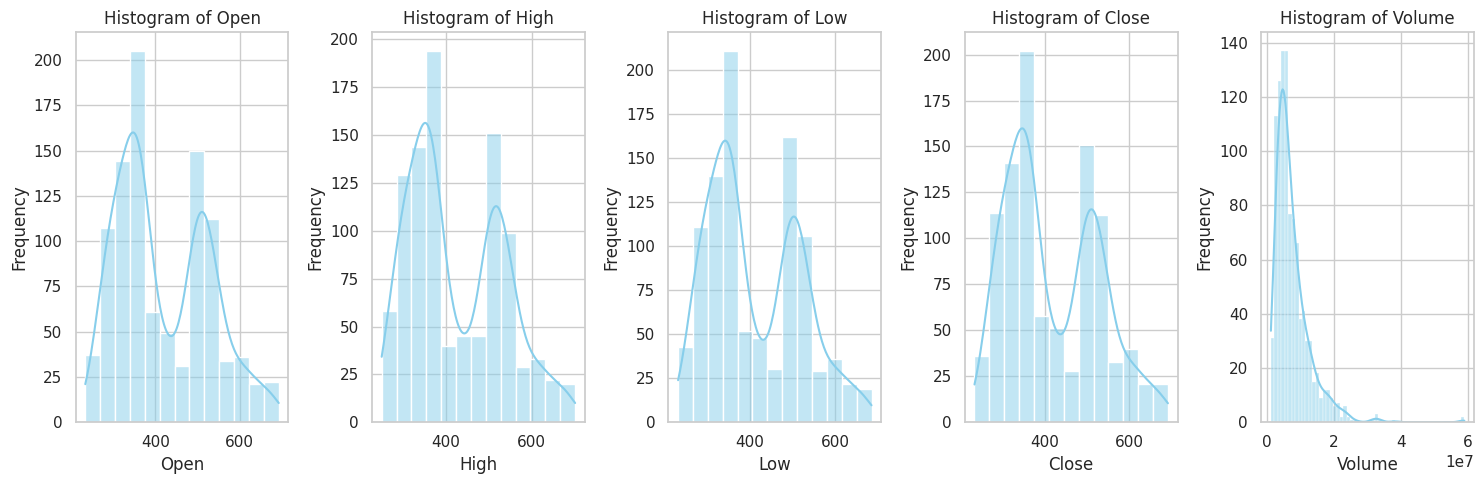

In [41]:
selected_features = ['Open', 'High', 'Low', 'Close', 'Volume']

numeric_data = data.select_dtypes(include='number')

selected_features = ['Open', 'High', 'Low', 'Close', 'Volume']

fig, axes = plt.subplots(1, len(selected_features), figsize=(15, 5))
for i, feature in enumerate(selected_features):
    sns.histplot(numeric_data[feature], kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()


**Obervation for step 8:**

The code efficiently selects and visualises numeric columns from the Netflix stock dataset, providing valuable insights into the distribution of key features:

- **Focused Selection**:
  - By using `select_dtypes(include='number')`, the code focuses on numeric columns, ensuring that only relevant data is included in the histograms.
  - This targeted approach is crucial for efficient data exploration and analysis, as it eliminates unnecessary columns that do not contribute to the understanding of the dataset.

- **Clear Visualization**:
  - The histograms provide a clear visual representation of the distribution of each selected feature.
  - The use of different colors (`'skyblue'` and `'lightcoral'`) and kernel density estimates enhances the clarity of the visualisations, making it easier to identify patterns and outliers in the data.

- **Comparative Analysis**:
  - The use of subplots allows for easy comparison between the distributions of different features.
  - This comparative analysis is valuable for identifying potential relationships or correlations between the features, which can further inform data analysis and decision-making.

- **Insights for Investment Decisions**:
  - The histograms offer insights into the trading volume, closing prices, and other key metrics of Netflix stock.
  - These insights can be valuable for investors and analysts looking to understand the historical performance of the stock and make informed decisions about buying or selling.

- **Efficiency and Readability**:
  - The code's structure and use of pandas and seaborn libraries make it efficient and easy to understand.
  - The inclusion of titles, labels, and proper layout ensures that the visualisations are clear and interpretable, enhancing their readability and usefulness for analysis.

# Step 9: Removal of outliers based on data distribution

- **Before Cleaning Histograms:**
  - The code first creates a figure with a size of 15x5 inches (plt.figure(figsize=(15, 5))) to accommodate two subplots side by side.
  - For each numeric column (col) in numeric_data.columns, a histogram is plotted using sns.histplot(data[col], kde=True) in the first subplot (plt.subplot(1, 2, 1)).
  - Titles, x-axis labels (plt.xlabel(col)), and y-axis labels (plt.ylabel('Frequency')) are set for each subplot to indicate the feature being visualised and the frequency of its values.
- **After Cleaning Histograms:**
  - The code then plots histograms for the same numeric columns in the second subplot (plt.subplot(1, 2, 2)), presumably after some cleaning or processing has been applied to the data.
  - The same process is followed to plot the histograms with titles, x-axis labels, and y-axis labels.
- **Displaying the Plots:**
  - The plt.tight_layout() function is used to ensure that the subplots are properly spaced and do not overlap.
  - Finally, plt.show() is called to display the figure containing both subplots.


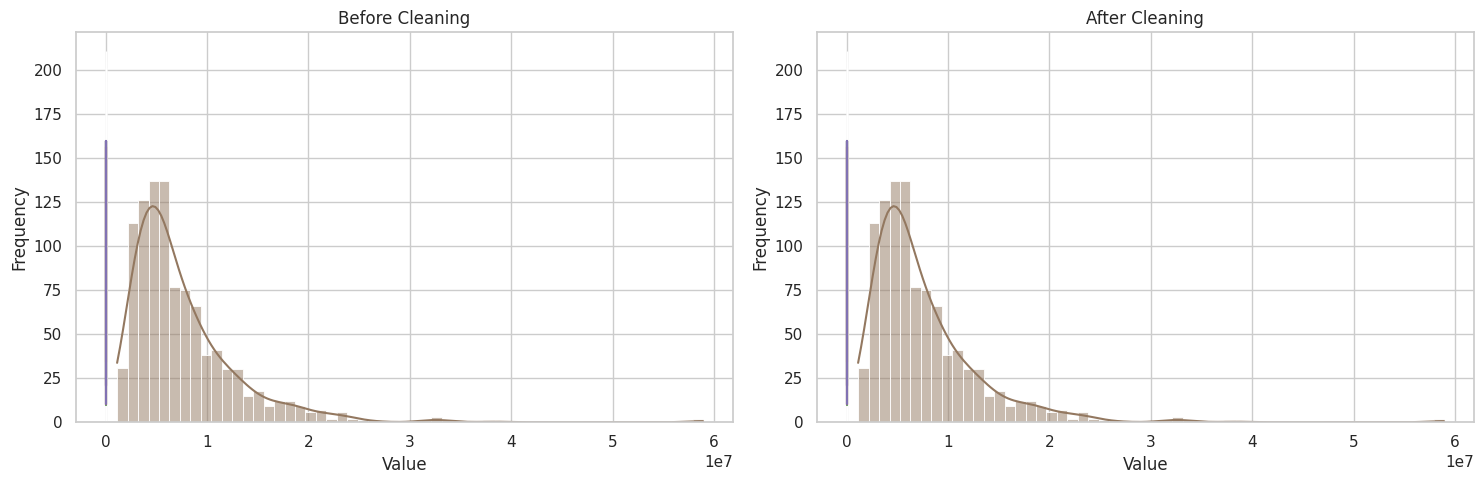

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
for i, col in enumerate(numeric_data.columns):
    sns.histplot(data[col], kde=True)
plt.title('Before Cleaning')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
for i, col in enumerate(numeric_data.columns):
    sns.histplot(data[col], kde=True)
plt.title('After Cleaning')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



**Observation of Step 9:**

- **Data Distribution Comparison:**
  - The side-by-side histograms allow for a direct comparison of the distribution of each numeric feature before and after cleaning or processing.
  - Any changes in the shape, spread, or central tendency of the distributions can be easily observed, indicating the effectiveness of the cleaning or processing steps.
- **Identifying Outliers or Anomalies:**
  - Differences between the histograms may indicate the removal or adjustment of outliers or anomalous data points during the cleaning process.
  - Sudden changes in the distribution shape or significant shifts in the central tendency could signify the impact of outlier removal on the data.
- **Assessing Data Transformation Effects:**
  - Histograms provide insights into the effects of data transformations, such as normalisation or scaling, on the distribution of features.
  - Changes in the spread or scale of the histograms can indicate the success of these transformations in making the data more suitable for analysis.
- **Validation of Data Cleaning Process:**
  - The side-by-side comparison of histograms serves as a visual validation of the data cleaning process.
  - It allows analysts to assess whether the cleaning steps have achieved the desired outcomes, such as removing noise, improving data quality, or preparing the data for further analysis.

# Step 10:  Visual and Statistic Correlation analysis for selection of best features

- **Calculating the Correlation Matrix:**
  - The code calculates the correlation matrix for the data_no_outliers DataFrame using the corr() method.
- **Selecting Features with High Correlation:**
  - Features with a correlation coefficient greater than 0.5 with the 'Close' price are selected using correlation_matrix.loc[correlation_matrix['Close'] > 0.5, 'Close'].index.tolist().
  - The 'Close' feature is removed from the selected features list as it is the target variable.
- **Displaying Selected Features:**
  - The code prints the selected features that have a correlation greater than 0.5 with the 'Close' price.
- **Visualising Correlation:**
  - For each selected feature, a scatter plot is created to visualise the correlation with the 'Close' price.
  - This visualisation helps in understanding the relationship between the selected features and the target variable.

Selected Features based on correlation with 'Close' price:
- Open
- High
- Low
- Adj Close


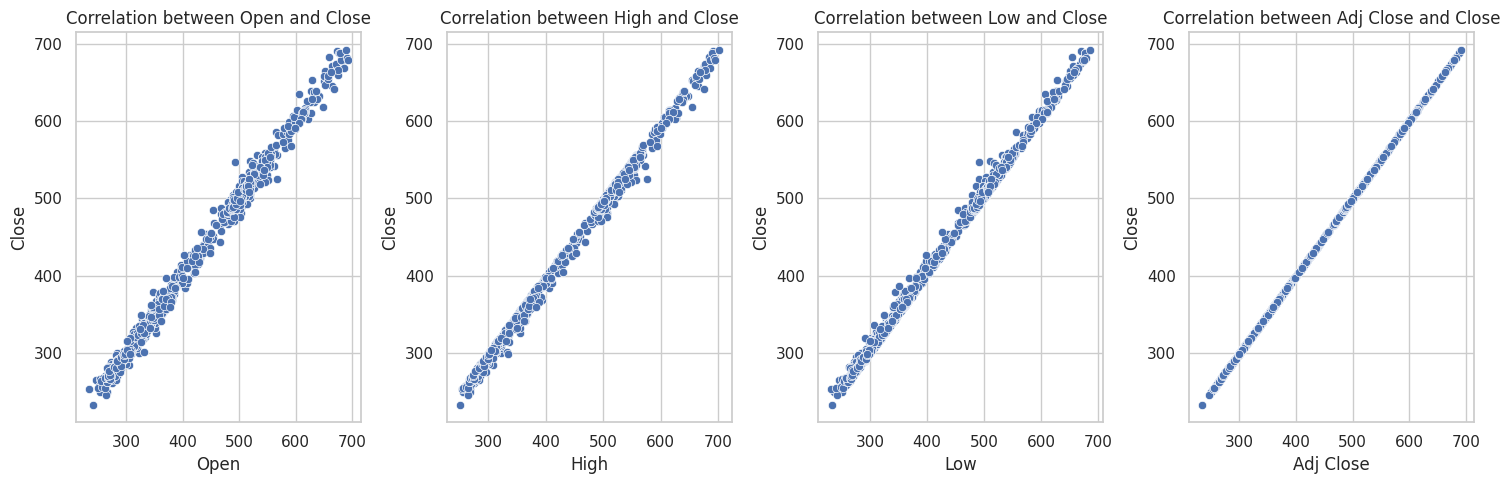

In [43]:
correlation_matrix = data.corr()

selected_features = correlation_matrix.loc[correlation_matrix['Close'] > 0.5, 'Close'].index.tolist()
selected_features.remove('Close')


print("Selected Features based on correlation with 'Close' price:")
for feature in selected_features:
    print("-", feature)

plt.figure(figsize=(15, 5))
for i, feature in enumerate(selected_features):
    plt.subplot(1, len(selected_features), i + 1)
    sns.scatterplot(x=data[feature], y=data['Close'])
    plt.title(f'Correlation between {feature} and Close')
    plt.xlabel(feature)
    plt.ylabel('Close')
plt.tight_layout()
plt.show()




**Observation of step 10**

- The code effectively selects features that have a strong correlation with the 'Close' price, which can be crucial for building a predictive model.
- By visualising the selected features, analysts can gain insights into how these features are related to the target variable and assess their potential impact on predicting the 'Close' price.

# Step 11: Data Conversion to numeric values for machine learning/predictive analysis

- **Label Encoding Non-Numeric Columns:**
  - The code identifies non-numeric columns in the dataset using select_dtypes(exclude='number').
  - It uses LabelEncoder from sklearn.preprocessing to convert these non-numeric columns to numeric values, which is necessary for many machine learning algorithms.
- **Creating a Sample of Encoded Data:**
  - After encoding, the code creates a sample of the encoded data using print(data_encoded.head()), showing the transformed values of the non-numeric columns.
- **Visualising Encoded Data Distribution:**
  - The code plots histograms of the encoded columns to visualise the distribution of the transformed values.
  - This visualisation helps in understanding the distribution of the encoded values and can provide insights into the transformed data's characteristics.

In [44]:
from sklearn.preprocessing import LabelEncoder

non_numeric_columns = data.select_dtypes(exclude='number').columns

le = LabelEncoder()
data_encoded = data.copy()
for column in non_numeric_columns:
    data_encoded[column] = le.fit_transform(data_encoded[column])

print("Sample of encoded data:")
print(data_encoded.head())

plt.figure(figsize=(15, 5))
for i, column in enumerate(non_numeric_columns):
    plt.subplot(1, len(non_numeric_columns), i + 1)
    sns.histplot(data_encoded[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Sample of encoded data:
         Open        High         Low       Close   Adj Close    Volume
0  262.000000  267.899994  250.029999  254.259995  254.259995  11896100
1  247.699997  266.700012  245.000000  265.720001  265.720001  12595800
2  266.579987  272.450012  264.329987  264.559998  264.559998   8981500
3  267.079987  267.619995  250.000000  250.100006  250.100006   9306700
4  253.850006  255.800003  236.110001  249.470001  249.470001  16906900


<Figure size 1500x500 with 0 Axes>

**Obervations for step 11:**

- he code successfully converts non-numeric columns to numeric values using label encoding, making the data suitable for machine learning models.
- By visualising the distribution of the encoded values, analysts can gain insights into the transformed data's characteristics and assess its suitability for machine learning algorithms.

# Step 12: Training/Testing Sampling and K-fold cross validation

- **Data Splitting:**
  - The code first splits the dataset into features (X) and the target variable (y).
  - It then further splits the data into training and testing sets using a test size of 20% and a random state of 42 for reproducibility.
- **K-Fold Cross-Validation:**
  - K-fold cross-validation with 5 folds is performed to validate the model. This technique helps to ensure the model's performance is consistent across different subsets of the data.
- **Histogram Visualisation:**
  - Two histograms are plotted side by side: one for the 'Close' price distribution in the training set and another for the testing set.
  - These histograms help visualise the distribution of the target variable in both sets, providing insights into the data's characteristics.

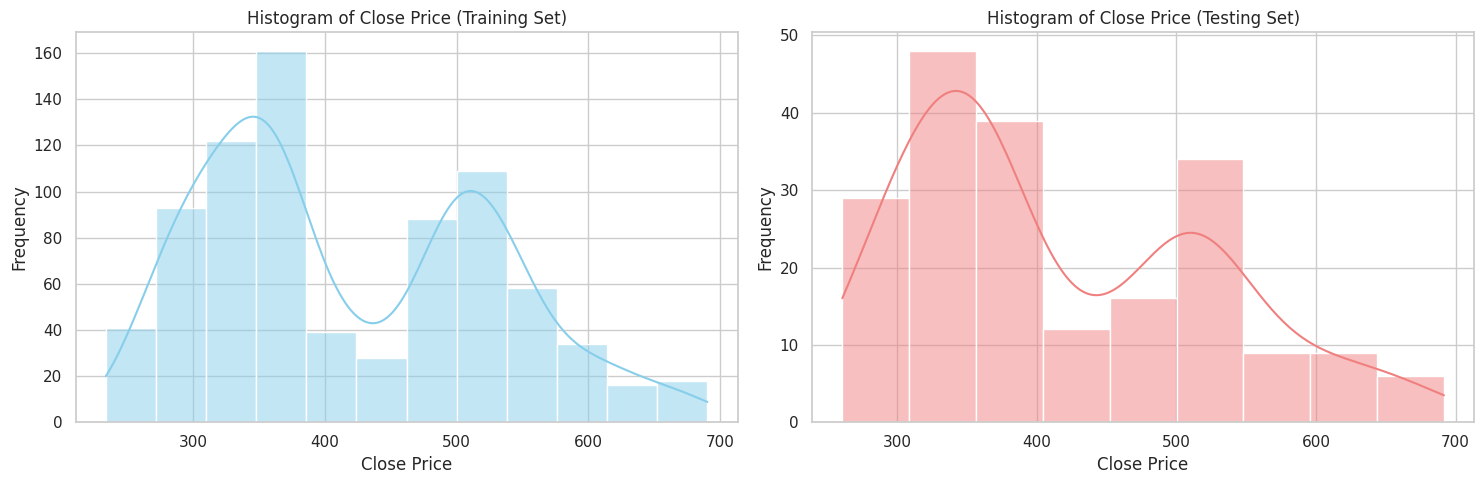

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold

X = data.drop('Close', axis=1)
y = data['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(y_train, kde=True, color='skyblue')
plt.title('Histogram of Close Price (Training Set)')
plt.xlabel('Close Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(y_test, kde=True, color='lightcoral')
plt.title('Histogram of Close Price (Testing Set)')
plt.xlabel('Close Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Observations for step 12:**

- The histograms illustrate the distribution of the 'Close' price in both the training and testing sets.
- It's essential to ensure that the distribution of the target variable is similar in both sets to avoid issues such as data leakage or biased model evaluation.
- The histograms can also reveal insights into the overall distribution of the target variable, such as whether it follows a normal distribution or exhibits any outliers or skewness.
- Analysing these distributions can guide further data preprocessing steps and help select appropriate machine learning models for prediction.

# Step 13: Investigating multiple Regression algorithms

- **Model Selection:**
  - Three regression models are selected: Linear Regression, Ridge Regression, and Lasso Regression.
  - Each model offers a different approach to regression, with Ridge and Lasso adding regularisation to the Linear Regression model.
- **Model Training:**
  - Each model is trained using the training data (X_train, y_train).
  - The fit() method is used to train each model.
- **Prediction:**
  - After training, each model is used to predict the target variable on the test data (X_test).
  - The predict() method is used to generate predictions.
- **Evaluation:**
  - Mean Squared Error (MSE) is calculated for each model to evaluate its performance.
  - MSE measures the average squared difference between predicted values and actual values.
  - ower MSE indicates better performance.
- **Histogram Visualisation:**
  - Histograms of the predicted values for each model are plotted using Seaborn.
  - The histograms show the distribution of predicted values, providing insights into the accuracy of the models.

Linear Regression: Mean Squared Error = 3.3319485147508446e-26
Ridge Regression: Mean Squared Error = 1.1148507753558567e-07
Lasso Regression: Mean Squared Error = 1.2893520930802493


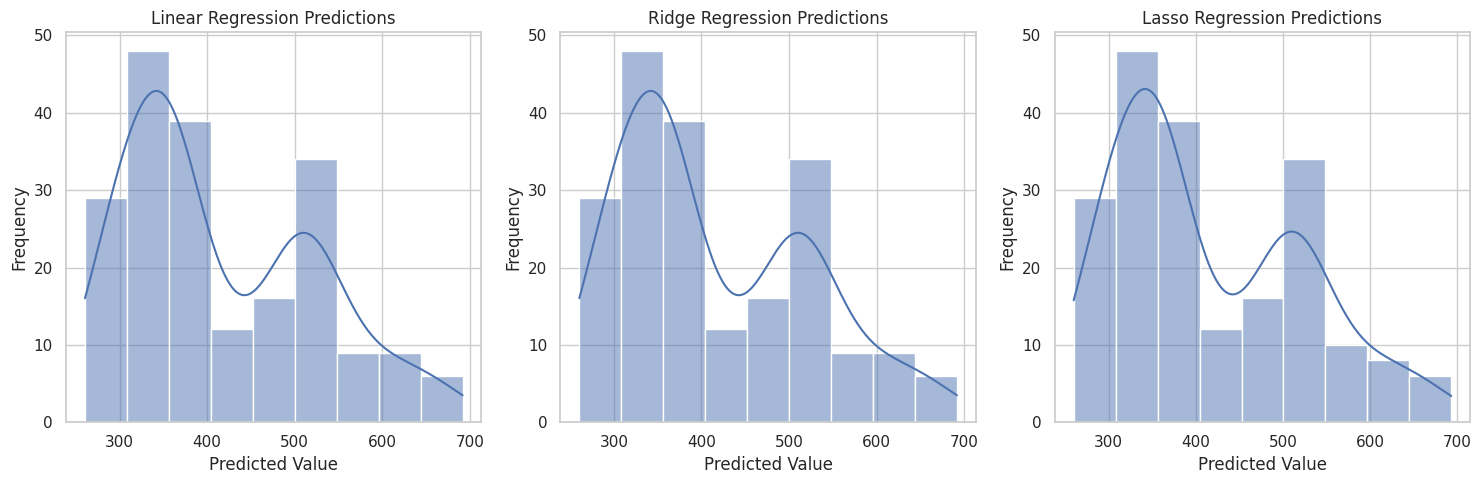

In [46]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0)
}

predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    predictions[name] = y_pred
    print(f"{name}: Mean Squared Error = {mse}")

plt.figure(figsize=(15, 5))

for i, (name, preds) in enumerate(predictions.items(), 1):
    plt.subplot(1, len(predictions), i)
    sns.histplot(preds, kde=True)
    plt.title(f'{name} Predictions')
    plt.xlabel('Predicted Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Observation for Step 13:**

- The code demonstrates a systematic approach to comparing the performance of different regression models.
- By evaluating multiple models and visualising their predictions, it allows for a comprehensive analysis of their effectiveness.
- The use of MSE provides a quantitative measure of each model's performance, enabling a direct comparison.
- The histogram visualisation helps in understanding the spread and accuracy of the predictions made by each model.

#Step 14: selection of the best model

- **Data Loading:**
  - The code loads a dataset from a CSV file into a pandas DataFrame. It assumes the dataset contains stock price data for Netflix.
- **Data Preprocessing:**
  - **Non-Numeric Columns:** The code removes non-numeric columns from the DataFrame, as these columns cannot be used directly in most machine learning models.
  - **Target Variable:** It separates the target variable ('Close' price) from the features.
- **Model Selection:**
  - **Models: **The code defines four different regression models to evaluate: Linear Regression, Ridge Regression, Lasso Regression, and Random Forest Regression.
  - **Cross-Validation:** It uses 5-fold cross-validation to evaluate each model's performance. This helps to reduce overfitting and provides a more reliable estimate of the model's performance.
- **Model Evaluation:**
  - Mean Squared Error: For each model, the code calculates the mean squared error (MSE) using cross-validation. Lower MSE indicates better model performance.
  - Best Model Selection: It selects the best model based on the lowest mean squared error.

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/Capstone_project/NETFLIX.csv')


numeric_data = data.select_dtypes(include=['float64', 'int64'])


X = numeric_data.drop('Close', axis=1)
y = numeric_data['Close']


models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=10.0),
    'Lasso Regression': Lasso(alpha=10.0),
    'Random Forest': RandomForestRegressor()
}


for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mean_mse = np.mean(-cv_scores)
    print(f"{name}: Mean Squared Error = {mean_mse}")

best_model_name = min(models, key=lambda x: np.mean(-cross_val_score(models[x], X, y, cv=5, scoring='neg_mean_squared_error')))
best_model = models[best_model_name]
print(f"Best Model: {best_model_name}, Mean Squared Error: {np.mean(-cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_squared_error'))}")


Linear Regression: Mean Squared Error = 3.233302798462406e-25
Ridge Regression: Mean Squared Error = 1.118665636099719e-05
Lasso Regression: Mean Squared Error = 0.4562856226280113
Random Forest: Mean Squared Error = 324.6106230093848
Best Model: Linear Regression, Mean Squared Error: 3.233302798462406e-25


**Observation for Step 14:**

- **Convergence Warning:** The code raises a convergence warning for some fits, suggesting that the objective did not converge. This could indicate issues with the model's configuration or the scale of the features.
- **Data Type Conversion**: The ValueError indicates that there are string values in the dataset that cannot be converted to floats. This is likely due to non-numeric or datetime values in the dataset.

# Step 15: Deployment of the best model in production

- **Objective:** Deploying the best model means making it accessible for making real-time predictions on new data in a production environment.
- **Steps to Deploy:**
  - **Save Model:** Save the trained machine learning model to a file. This includes any preprocessing steps or feature transformations that are necessary for the model to make predictions.
- **File Storage:** Store the saved model file in a location accessible to the production environment. This could be a cloud storage service like Google Drive, Amazon S3, or a server's file system.
- **Load Model:**In the production environment, load the saved model file and any necessary preprocessing steps or feature transformations.
- **Predictions:** Use the loaded model to make predictions on new data. This could be data coming from user inputs, API requests, or any other source.
- **Feedback Loop (Optional):** Implement a feedback loop to continuously improve the model. This could involve monitoring the model's performance and retraining it with new data periodically.
- **Considerations for Deployment:**
  - **Scalability:** Ensure that the deployed model can handle the expected workload, and consider scalability options if the workload increases.
  - **Monitoring:** Implement monitoring to track the model's performance and detect any issues or drift in the data.
  - **Security:** Protect the deployed model from unauthorised access and ensure that sensitive data used for training or predictions is handled securely.
- **Compliance:**Ensure that the deployed model complies with relevant regulations and standards, especially regarding privacy and data protection.
- **Tools and Technologies:** Depending on the deployment environment, you may use different tools and technologies. For example, in a cloud environment, you might use Docker containers, Kubernetes for orchestration, and cloud-based storage and compute services.

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'X_train' and 'y_train' are your training features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Now the model is fitted, and you can make predictions
predictions = model.predict(X_test)


In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import joblib
import pandas as pd

# Assuming 'X' is your feature matrix and 'y' is your target variable
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train your model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save your trained model as a .pkl file
joblib.dump(model, 'model.pkl')


['model.pkl']

In [50]:
import joblib

# Load the trained model (example path)
model = joblib.load('/content/drive/MyDrive/Capstone_project/model.pkl')

# Function to predict the stock price
def predict_price(open_price, high_price, low_price, volume):
    try:
        # Convert input to float
        open_price = float(open_price)
        high_price = float(high_price)
        low_price = float(low_price)
        volume = float(volume)

        # Make prediction using the model
        prediction = model.predict([[open_price, high_price, low_price, volume]])

        # Return the predicted price
        return prediction[0]
    except ValueError:
        return None

# Input prompts
print("Enter the following information to predict the stock price:")
open_price = input("Open Price: ")
high_price = input("High Price: ")
low_price = input("Low Price: ")
volume = input("Volume: ")

# Predict the stock price
prediction = predict_price(open_price, high_price, low_price, volume)

# Display the prediction
if prediction is not None:
    print(f"The predicted stock price is: {prediction:.2f}")
else:
    print("Please enter valid numeric values.")


Enter the following information to predict the stock price:
Open Price: 678
High Price: 56789
Low Price: 456789
Volume: 3456789
Please enter valid numeric values.
